<a href="https://colab.research.google.com/github/mehravehj/Debiased_supernet_sampling/blob/main/Pooling_output_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting drive

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Loading
Load Functions

In [ ]:
# prompt: load outputs_epoch_"analysis_epoch".pt from folder /content/drive/MyDrive/paper4/pooling/test_"test_number"/outputs/

import torch

ground_truth_accs = {1: 87.45, 19: 90.92,
2 : 87.69, 20 : 90.88,
3 : 87.89, 21 : 90.14,
4 : 88.6, 22 : 89.68,
5 : 89.38, 23 : 90.34,
6 : 90.13, 24 : 90.52,
7 : 90.16, 25 : 90.85,
8 : 89.41, 26 : 89.71,
9 : 88.78, 27 : 91.05,
10 : 89.03, 28 : 90.96,
11 : 90.42, 29 : 91.55,
12 : 90.57, 30 : 89.84,
13 : 90.89, 31 : 91.78,
14 : 91.01, 32 : 91.83,
15 : 90.22, 33 : 90.96,
16 : 89.1, 34 : 92.01,
17 : 89.7, 35 : 90.47,
18 : 90.61, 36 : 89.99}

all_paths = (
'(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)', '(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)', '(0, 1, 0, 0, 1, 0, 0, 0, 0, 0)', '(0, 1, 0, 0, 0, 1, 0, 0, 0, 0)', '(0, 1, 0, 0, 0, 0, 1, 0, 0, 0)', '(0, 1, 0, 0, 0, 0, 0, 1, 0, 0)', '(0, 1, 0, 0, 0, 0, 0, 0, 1, 0)', '(0, 1, 0, 0, 0, 0, 0, 0, 0, 1)', '(0, 0, 1, 1, 0, 0, 0, 0, 0, 0)', '(0, 0, 1, 0, 1, 0, 0, 0, 0, 0)', '(0, 0, 1, 0, 0, 1, 0, 0, 0, 0)', '(0, 0, 1, 0, 0, 0, 1, 0, 0, 0)', '(0, 0, 1, 0, 0, 0, 0, 1, 0, 0)', '(0, 0, 1, 0, 0, 0, 0, 0, 1, 0)', '(0, 0, 1, 0, 0, 0, 0, 0, 0, 1)', '(0, 0, 0, 1, 1, 0, 0, 0, 0, 0)', '(0, 0, 0, 1, 0, 1, 0, 0, 0, 0)', '(0, 0, 0, 1, 0, 0, 1, 0, 0, 0)', '(0, 0, 0, 1, 0, 0, 0, 1, 0, 0)', '(0, 0, 0, 1, 0, 0, 0, 0, 1, 0)', '(0, 0, 0, 1, 0, 0, 0, 0, 0, 1)', '(0, 0, 0, 0, 1, 1, 0, 0, 0, 0)', '(0, 0, 0, 0, 1, 0, 1, 0, 0, 0)', '(0, 0, 0, 0, 1, 0, 0, 1, 0, 0)', '(0, 0, 0, 0, 1, 0, 0, 0, 1, 0)', '(0, 0, 0, 0, 1, 0, 0, 0, 0, 1)', '(0, 0, 0, 0, 0, 1, 1, 0, 0, 0)', '(0, 0, 0, 0, 0, 1, 0, 1, 0, 0)', '(0, 0, 0, 0, 0, 1, 0, 0, 1, 0)', '(0, 0, 0, 0, 0, 1, 0, 0, 0, 1)', '(0, 0, 0, 0, 0, 0, 1, 1, 0, 0)', '(0, 0, 0, 0, 0, 0, 1, 0, 1, 0)', '(0, 0, 0, 0, 0, 0, 1, 0, 0, 1)', '(0, 0, 0, 0, 0, 0, 0, 1, 1, 0)', '(0, 0, 0, 0, 0, 0, 0, 1, 0, 1)', '(0, 0, 0, 0, 0, 0, 0, 0, 1, 1)'
)


def load_output(analysis_epoch, test_number):
    file_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/outputs/outputs_epoch_{analysis_epoch}.pt'
    loaded_output = torch.load(file_path, weights_only=False)
    return loaded_output


def load_grad(analysis_epoch, test_number):
    file_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/gradients/gradients_epoch_{analysis_epoch}.pt'
    loaded_grad = torch.load(file_path, weights_only=False)
    return loaded_grad

def load_feature_maps(analysis_epoch, test_number):
    file_path = f'/content/drive/MyDrive/paper4/pooling/test_{test_number}/feature_maps/feature_maps_epoch_{analysis_epoch}.pt'
    loaded_features = torch.load(file_path, weights_only=False)
    return loaded_features


# 1. Outputs

Load

In [ ]:
analysis_epoch = 46  # Replace with the desired epoch number
test_number = 3000      # Replace with the desired test number

import gc

gc.collect()

loaded_output = load_output(analysis_epoch, test_number)

In [ ]:
# prompt: ispect loaded_output

print(type(loaded_output))
print(loaded_output)
if isinstance(loaded_output, torch.Tensor):
    print(loaded_output.shape)
    print(loaded_output.device)
    print(loaded_output.dtype)
elif isinstance(loaded_output, dict):
    for key, value in loaded_output.items():
        print(f"Key: {key}, Type: {type(value)}")
        if isinstance(value, torch.Tensor):
            print(f"  Shape: {value.shape}, Device: {value.device}, Dtype: {value.dtype}")


<class 'dict'>
{'(0, 1, 1, 0, 0, 0, 0, 0, 0, 0)': tensor([[-5.1002e-03, -1.2861e-01,  2.9118e-01,  ...,  1.5651e+00,
         -1.6930e+00, -8.2214e-01],
        [-2.5362e+00, -4.4426e+00,  1.1223e+00,  ...,  8.1513e+00,
         -6.4268e+00, -2.6961e+00],
        [-4.4828e+00, -4.2631e+00,  1.0210e+00,  ..., -3.0107e-01,
         -4.2302e+00, -4.0884e+00],
        ...,
        [-2.5085e+00, -4.3190e+00,  8.6837e-01,  ...,  4.3078e+00,
         -4.6071e+00, -2.3977e+00],
        [-1.0781e+00, -2.2395e+00,  2.1095e+00,  ...,  4.3743e-01,
         -2.3959e+00, -1.4651e+00],
        [ 5.6231e+00, -1.5390e+00,  1.1497e-01,  ..., -2.6428e+00,
          6.4108e+00,  5.1490e-01]]), '(0, 1, 0, 1, 0, 0, 0, 0, 0, 0)': tensor([[-0.1453, -0.4814, -0.2408,  ...,  2.2926, -2.5490, -1.0524],
        [-2.0794, -3.3997,  0.5933,  ...,  7.6890, -6.0232, -1.3797],
        [-3.7922, -3.6589,  0.0770,  ...,  0.5329, -4.6654, -3.4515],
        ...,
        [-2.7918, -4.6194,  1.0850,  ...,  4.0797, -4.3484, 

Analysis

Conversion to tensor form the dict

In [ ]:
# prompt: using all_paths as keys, convert loaded_output to a 3d tensor of size 36,512,10

# Assuming loaded_output is a dictionary where keys are in all_paths and values are tensors of size 512x10
tensor_list = []
for path in all_paths:
  if path in loaded_output:
    tensor_list.append(loaded_output[path])
  else:
    # Handle cases where a path might not be in loaded_output if necessary
    # For example, append a zero tensor of the correct size
    tensor_list.append(torch.zeros(2000, 10)) # Or handle this case differently

# Stack the tensors to create a 3D tensor
output_tensor_3d = torch.stack(tensor_list)

print(output_tensor_3d.shape)
print(output_tensor_3d.device)
output_tensor_3d.dtype

torch.Size([36, 2000, 10])
cpu


torch.float32

⏰ Optional : Remove Easy samples : total agreement on classification

In [ ]:
predictions = output_tensor_3d.argmax(dim=2)
all_agree_mask = (predictions.max(dim=0).values == predictions.min(dim=0).values) # Shape: [512]
# Samples to KEEP (where not all models agree)
samples_to_keep_mask = ~all_agree_mask # Shape: [512]

# Get the indices of samples to keep
indices_to_keep = samples_to_keep_mask.nonzero(as_tuple=True)[0]

# Filter your output_tensor_3d and similarity_image
output_tensor_3d = output_tensor_3d[:, indices_to_keep, :] # Shape: [36, N_filtered_samples, 10]

print(f"Original number of samples: {output_tensor_3d.shape[1]}")
print(f"Number of samples where all models agree: {all_agree_mask.sum().item()}")
print(f"Number of filtered samples (where at least one model disagrees): {output_tensor_3d.shape[1]}")

Original number of samples: 321
Number of samples where all models agree: 191
Number of filtered samples (where at least one model disagrees): 321


Cosine Similarity

In [ ]:
import torch.nn.functional as F
similarity_image = F.cosine_similarity(output_tensor_3d.unsqueeze(1).cuda(), output_tensor_3d.unsqueeze(0).cuda(), dim=3)
print(similarity_image[0,35,:5])
Output_cosine_distance = 1 - similarity_image
print(Output_cosine_distance[0,35,:5])
print(Output_cosine_distance.shape)

tensor([0.9466, 0.9706, 0.9845, 0.9917, 0.8623, 0.9916, 0.9700, 0.9852, 0.9903,
        0.9812, 0.8172, 0.9975, 0.9432, 0.9858, 0.9856, 0.9948, 0.9691, 0.9799,
        0.8902, 0.8903, 0.9818, 0.9713, 0.9729, 0.9322, 0.9861, 0.9941, 0.7947,
        0.8334, 0.9901, 0.9881, 0.9380, 0.9819, 0.9621, 0.9948, 0.9677, 0.9108,
        0.9590, 0.9790, 0.9547, 0.8906, 0.9646, 0.9752, 0.9339, 0.9911, 0.9783,
        0.9811, 0.9962, 0.9822, 0.8383, 0.9675, 0.9827, 0.5405, 0.9724, 0.9742,
        0.9337, 0.9934, 0.9369, 0.9655, 0.8872, 0.9644, 0.9609, 0.9934, 0.9281,
        0.9599, 0.9532, 0.9697, 0.9674, 0.8994, 0.8990, 0.9746, 0.9693, 0.9869,
        0.9752, 0.9611, 0.9980, 0.7544, 0.9835, 0.9553, 0.9041, 0.9650, 0.8831,
        0.9696, 0.7311, 0.9892, 0.9767, 0.9744, 0.9378, 0.9585, 0.9070, 0.9912,
        0.9513, 0.9222, 0.9792, 0.9609, 0.8924, 0.9272, 0.9075, 0.8213, 0.9763,
        0.9377], device='cuda:0')
tensor([0.0486, 0.0230, 0.0179, 0.0075, 0.1111, 0.0073, 0.0178, 0.0179, 0.0084,
      

⏰ Optional: exclude samples that show high similarity for all paths

In [ ]:
avg_similarity_per_sample = []
num_subnets = similarity_image.shape[0]

for b in range(similarity_image.shape[2]):
    sample_matrix = similarity_image[:, :, b]
    sum_all = sample_matrix.sum()
    sum_diagonal = torch.diag(sample_matrix).sum()
    num_off_diagonal_elements = num_subnets * num_subnets - num_subnets

    if num_off_diagonal_elements > 0:
        avg_off_diagonal_for_sample = (sum_all - sum_diagonal) / num_off_diagonal_elements
    else:
        avg_off_diagonal_for_sample = torch.tensor(1.0)

    avg_similarity_per_sample.append(avg_off_diagonal_for_sample.item())

avg_similarity_per_sample_tensor = torch.tensor(avg_similarity_per_sample)

similarity_threshold = 0.95 # Example threshold

# 1. Create the boolean mask:
#    This tensor will have 'True' for samples that meet your criteria (avg sim <= threshold)
#    and 'False' for samples that don't.
samples_to_keep_mask_by_sim = (avg_similarity_per_sample_tensor <= similarity_threshold)

# 2. Get the indices from the boolean mask:
#    .nonzero() returns the indices where the tensor is True.
#    If 'as_tuple=True', it returns a tuple of 1D index tensors (one for each dimension).
#    Since samples_to_keep_mask_by_sim is 1D, we take the first element of the tuple [0].
indices_to_keep_by_sim = samples_to_keep_mask_by_sim.nonzero(as_tuple=True)[0]

# filtered_output_tensor_3d = original_output_tensor_3d[:, indices_to_keep_by_sim, :]
filtered_similarity_image = similarity_image[:, :, indices_to_keep_by_sim]
print(filtered_similarity_image.shape)



torch.Size([36, 36, 106])


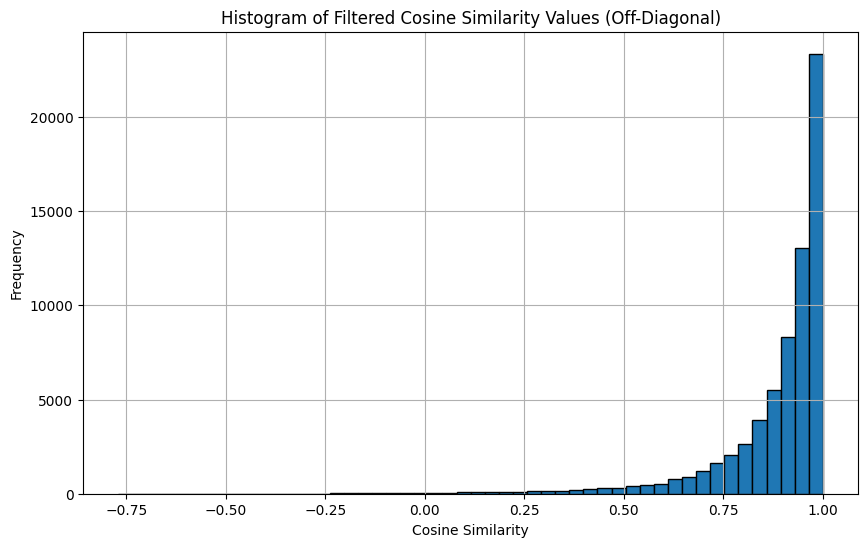

In [ ]:
# prompt: plot historgam of filtered_similarity_image

import matplotlib.pyplot as plt
import numpy as np

# Assuming filtered_similarity_image is a PyTorch tensor
# Convert the tensor to a numpy array if it's on GPU
if filtered_similarity_image.is_cuda:
    filtered_similarity_image_np = filtered_similarity_image.cpu().detach().numpy()
else:
    filtered_similarity_image_np = filtered_similarity_image.detach().numpy()

# The shape of filtered_similarity_image is (36, 36, N_filtered_samples).
# We want to plot the distribution of similarity values.
# We can flatten the relevant parts of the tensor to get a single list of values.

# Option 1: Plot all similarity values (including diagonal, which is always 1)
# flattened_similarity_values = filtered_similarity_image_np.flatten()

# Option 2: Plot only the off-diagonal similarity values (more informative of differences)
# Initialize an empty list to store off-diagonal values
off_diagonal_values = []

# Iterate through each sample in the filtered dimension (the last dimension)
for i in range(filtered_similarity_image_np.shape[2]):
    sample_matrix = filtered_similarity_image_np[:, :, i]
    # Get the indices of the upper triangle (excluding diagonal)
    upper_triangle_indices = np.triu_indices(sample_matrix.shape[0], k=1)
    # Append the values at these indices to the list
    off_diagonal_values.extend(sample_matrix[upper_triangle_indices])

# Convert the list to a numpy array
flattened_similarity_values = np.array(off_diagonal_values)


plt.figure(figsize=(10, 6))
plt.hist(flattened_similarity_values, bins=50, edgecolor='black')
plt.title('Histogram of Filtered Cosine Similarity Values (Off-Diagonal)')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# print(Output_cosine_distance[:,0,157])
n_sample = 2
print('sample:', n_sample)
for i in range(36):
  print("architecture", i)
  print('logits')
  print(output_tensor_3d[i,n_sample,:])
  # print(Output_cosine_distance[i,:,n_sample])

print(Output_cosine_distance[0,:,n_sample])

sample: 2
architecture 0
logits
tensor([ 2.5736,  4.7974, -1.2493, -2.2168, -2.1020, -2.8710, -2.2166, -1.5693,
         1.3474,  2.5405])
architecture 1
logits
tensor([ 2.5146,  4.6140, -1.1390, -2.0776, -2.0675, -2.7392, -2.0855, -1.5616,
         1.2699,  2.4855])
architecture 2
logits
tensor([ 2.4368,  4.6183, -1.2314, -2.1162, -2.0432, -2.7672, -2.1772, -1.3882,
         1.2263,  2.6179])
architecture 3
logits
tensor([ 2.4753,  4.3906, -1.1713, -2.0138, -1.9674, -2.6745, -2.2237, -1.3780,
         1.3170,  2.4192])
architecture 4
logits
tensor([ 2.4828,  4.3932, -1.1803, -2.0365, -1.9478, -2.6333, -2.1562, -1.5814,
         1.4878,  2.3089])
architecture 5
logits
tensor([ 2.5333,  4.5231, -1.2057, -2.0790, -1.9785, -2.5562, -2.2411, -1.4970,
         1.2545,  2.3900])
architecture 6
logits
tensor([ 2.5744,  4.9339, -1.2804, -2.2454, -2.0500, -2.8085, -2.3726, -1.5670,
         1.1511,  2.7972])
architecture 7
logits
tensor([ 2.4487,  4.8145, -1.5438, -2.3429, -2.0637, -2.7913, -2.

In [ ]:
# prompt: find max and min of Output_cosine_distance give me indices of vaules that are colse to max

import torch

# Ensure Output_cosine_distance is on CPU for numpy operations if needed
if Output_cosine_distance.is_cuda:
  Output_cosine_distance_cpu = Output_cosine_distance.cpu()
else:
  Output_cosine_distance_cpu = Output_cosine_distance

# Find the overall maximum and minimum values
max_value = Output_cosine_distance_cpu.max().item()
min_value = Output_cosine_distance_cpu.min().item()

print(f"Maximum value of Output_cosine_distance: {max_value}")
print(f"Minimum value of Output_cosine_distance: {min_value}")

# Define a tolerance or threshold for "close to max"
# You can adjust this value based on your needs
tolerance = 0.5

# Find indices where the value is close to the maximum value
# We use torch.isclose for floating point comparisons
close_to_max_indices = torch.isclose(Output_cosine_distance_cpu, torch.tensor(max_value, dtype=Output_cosine_distance_cpu.dtype), atol=tolerance)

# Get the actual indices (row, column, sample)
# .nonzero() returns a tensor of coordinates
indices_tensor = close_to_max_indices.nonzero()

print(f"\nIndices of values close to the maximum ({max_value} with tolerance {tolerance}):")
if indices_tensor.numel() > 0:
  # Print the indices
  for idx in indices_tensor:
    print(f"  Index: {idx.tolist()}")
else:
  print("  No values found close to the maximum within the given tolerance.")

# Note: The indices are in the format (model_index_1, model_index_2, sample_index)
# where model_index corresponds to the position in the `all_paths` list
# and sample_index corresponds to the index in the `output_tensor_3d` *after* filtering easy samples.

Maximum value of Output_cosine_distance: 1.7697018384933472
Minimum value of Output_cosine_distance: -2.384185791015625e-07

Indices of values close to the maximum (1.7697018384933472 with tolerance 0.5):
  Index: [0, 4, 157]
  Index: [0, 5, 157]
  Index: [0, 7, 157]
  Index: [0, 8, 157]
  Index: [0, 9, 157]
  Index: [0, 10, 157]
  Index: [0, 11, 157]
  Index: [0, 12, 157]
  Index: [0, 13, 157]
  Index: [0, 14, 157]
  Index: [0, 15, 157]
  Index: [0, 16, 157]
  Index: [0, 17, 157]
  Index: [0, 18, 157]
  Index: [0, 19, 157]
  Index: [0, 20, 157]
  Index: [0, 21, 157]
  Index: [0, 22, 157]
  Index: [0, 23, 157]
  Index: [0, 24, 157]
  Index: [0, 25, 157]
  Index: [0, 26, 157]
  Index: [0, 26, 180]
  Index: [0, 27, 157]
  Index: [0, 27, 180]
  Index: [0, 28, 157]
  Index: [0, 29, 157]
  Index: [0, 30, 157]
  Index: [0, 31, 157]
  Index: [0, 32, 157]
  Index: [0, 33, 157]
  Index: [0, 34, 157]
  Index: [0, 35, 157]
  Index: [0, 35, 358]
  Index: [1, 10, 157]
  Index: [1, 11, 157]
  Index:

**Overall model agreement**

Mean Pairwise Similarity Matrix Shape: torch.Size([36, 36])


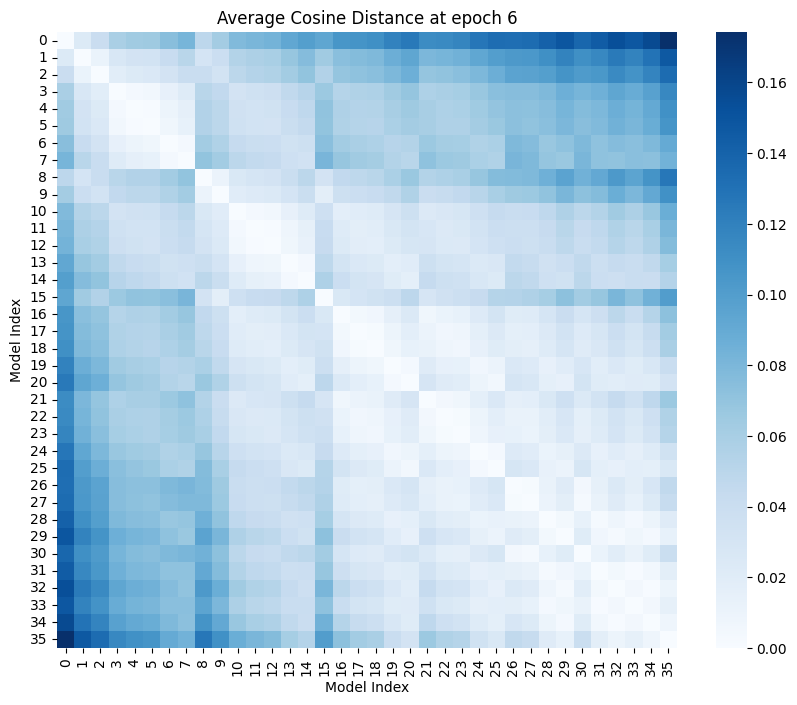

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Average Similarity Matrix
# Average similarity for each model pair across the batch
mean_pairwise_dist = Output_cosine_distance.mean(dim=2) # Shape: [36, 36]
print("Mean Pairwise Similarity Matrix Shape:", mean_pairwise_dist.shape)

# Convert to numpy for plotting
mean_pairwise_dist_np = mean_pairwise_dist.cpu().numpy()

plt.figure(figsize=(10, 8))
sns.heatmap(mean_pairwise_dist_np, cmap="Blues",
            xticklabels=[f"{i}" for i in range(36)],
            yticklabels=[f"{i}" for i in range(36)])
plt.title(f"Average Cosine Distance at epoch {analysis_epoch}")
plt.xlabel("Model Index")
plt.ylabel("Model Index")
plt.show()

**Pairwise Model agreement**

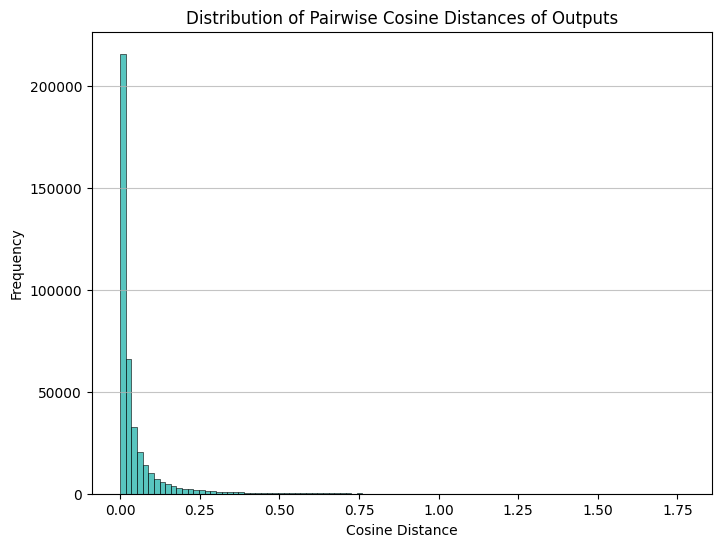

In [ ]:
# Flatten all off-diagonal similarities (excluding self-similarity)
# (Optional: for a cleaner view, exclude the diagonal where values are always 1)
off_diagonal_dist = []
for i in range(36):
    for j in range(36):
        if i != j:
            off_diagonal_dist.extend(Output_cosine_distance[i, j, :].tolist())

plt.figure(figsize=(8, 6))
sns.histplot(off_diagonal_dist, bins=100, color='lightseagreen') # 'skyblue', 'deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind', 'red', 'green', 'blue', 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.title("Distribution of Pairwise Cosine Distances of Outputs")
plt.xlabel("Cosine Distance")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.75)
plt.show()

**Model Outliers**

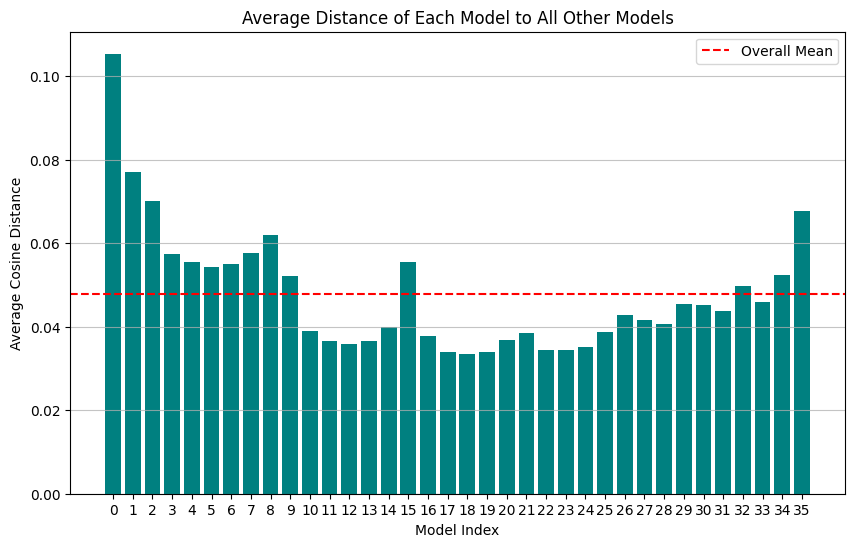

In [ ]:
model_avg_dist_to_others = []
for i in range(36):
    # Get the row corresponding to model i
    row_i = mean_pairwise_dist[i, :]
    # Exclude the self-similarity (diagonal element)
    avg_to_others = (row_i.sum() - row_i[i]) / (36 - 1)
    model_avg_dist_to_others.append(avg_to_others.item())

plt.figure(figsize=(10, 6))
plt.bar(range(36), model_avg_dist_to_others, color='teal')
plt.title("Average Distance of Each Model to All Other Models")
plt.xlabel("Model Index")
plt.ylabel("Average Cosine Distance")
plt.xticks(range(36))
plt.axhline(y=np.mean(model_avg_dist_to_others), color='r', linestyle='--', label='Overall Mean')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


**Density**

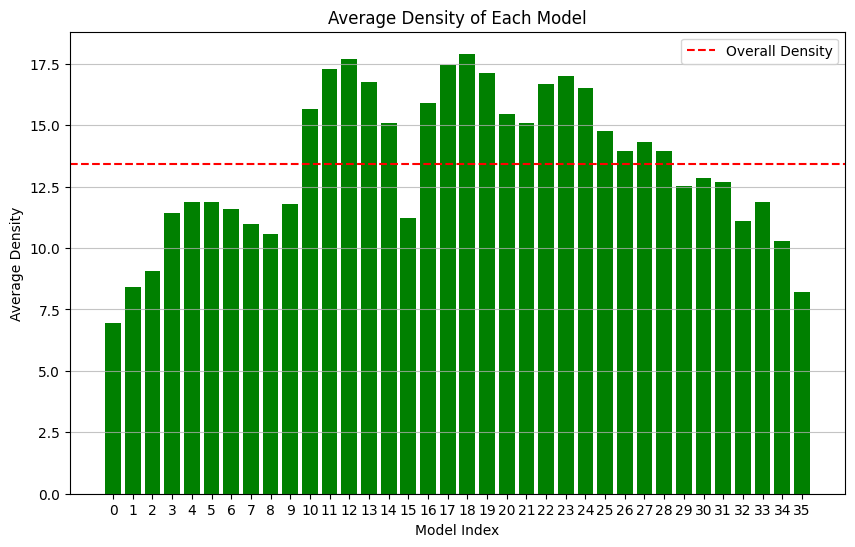

In [ ]:
model_avg_dist_to_others = []
for i in range(36):
    # Get the row corresponding to model i
    row_i = mean_pairwise_dist[i, :]
    # Exclude the self-similarity (diagonal element)
    avg_to_others = (row_i.sum() - row_i[i]) / (36 - 1)
    model_avg_dist_to_others.append(avg_to_others.item())

epsilon = 1e-8
output_density = [1/(i+epsilon) for i in model_avg_dist_to_others]

plt.figure(figsize=(10, 6))
plt.bar(range(36), output_density, color='green')
plt.title("Average Density of Each Model")
plt.xlabel("Model Index")
plt.ylabel("Average Density")
plt.xticks(range(36))
plt.axhline(y=np.mean(output_density), color='r', linestyle='--', label='Overall Density')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()